In [2]:
from captum.attr import LayerActivation
from activations_tool import activations, model
from input_generation import rasterize_text


img = rasterize_text("Trump")

channel = 1052

layer_4_1_acts = activations(model.visual.layer4[1].relu, img)[0][channel]
prev_conv_acts = activations(model.visual.layer4[2].bn3, img)[0][channel]

# In last layer, bn3 is added with previous bottleneck.relu prior to a re-relu
# We use conv3 instead of bn3 because bn is just a normalization operation
print(model.visual.layer4[1].relu)
print(model.visual.layer4[2].conv3)
print(model.visual.layer4[2])

print(model.visual)

print("Previous layer (4/1/...):", layer_4_1_acts.mean(0).mean(0).item())
print("This layer, previous conv:", prev_conv_acts.mean(0).mean(0).item())

ReLU(inplace=True)
Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
Bottleneck(
  (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avgpool): Identity()
  (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
)
ModifiedResNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, aff

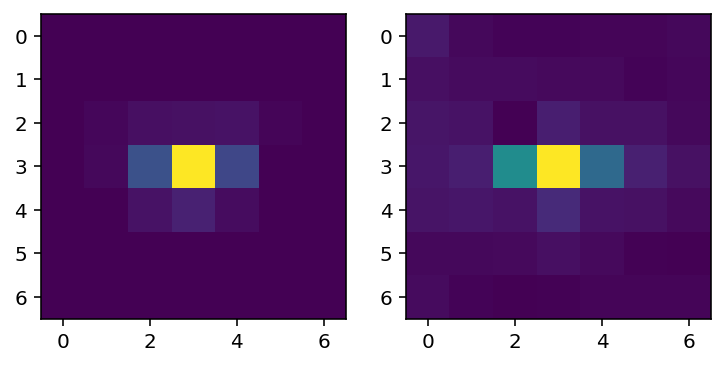

In [81]:
import matplotlib.pyplot as plt
import numpy as np

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2);

# axarr[0].title("Layer 4/1 activations");
axarr[0].imshow(layer_4_1_acts.detach().cpu().numpy().astype(np.float));
axarr[1].imshow(prev_conv_acts.detach().cpu().numpy().astype(np.float));